In [18]:
import pandas as pd

In [19]:
amazon_stock_data = pd.read_csv('/kaggle/input/amazon-stock-data/Amazon_Stock_Data.csv')
amazon_stock_data.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-02,15.425999641418457,15.425999641418457,15.737500190734863,15.347999572753906,15.628999710083008,55664000
3,2015-01-05,15.10949993133545,15.10949993133545,15.418999671936035,15.042499542236328,15.350500106811523,55484000
4,2015-01-06,14.76449966430664,14.76449966430664,15.149999618530273,14.619000434875488,15.112000465393066,70380000


In [20]:
amazon_stock_data = amazon_stock_data.drop(index=[0, 1]).reset_index(drop=True)

In [21]:
amazon_stock_data.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

In [22]:
amazon_stock_data['Date'] = pd.to_datetime(amazon_stock_data['Date'])
numeric_columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
amazon_stock_data[numeric_columns] = amazon_stock_data[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [23]:
amazon_stock_data.info(), amazon_stock_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2501 non-null   datetime64[ns]
 1   Adj Close  2501 non-null   float64       
 2   Close      2501 non-null   float64       
 3   High       2501 non-null   float64       
 4   Low        2501 non-null   float64       
 5   Open       2501 non-null   float64       
 6   Volume     2501 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 136.9 KB


(None,
         Date  Adj Close    Close     High      Low     Open    Volume
 0 2015-01-02    15.4260  15.4260  15.7375  15.3480  15.6290  55664000
 1 2015-01-05    15.1095  15.1095  15.4190  15.0425  15.3505  55484000
 2 2015-01-06    14.7645  14.7645  15.1500  14.6190  15.1120  70380000
 3 2015-01-07    14.9210  14.9210  15.0640  14.7665  14.8750  52806000
 4 2015-01-08    15.0230  15.0230  15.1570  14.8055  15.0160  61768000)

In [24]:
amazon_stock_data.describe()

,Date,Adj Close,Close,High,Low,Open,Volume
count,2501,2501.000000,2501.000000,2501.000000,2501.000000,2501.000000,2.501000e+03
mean,2019-12-20 21:48:08.924430336,100.484731,100.484731,101.649652,99.262112,100.505960,7.639864e+07
min,2015-01-02 00:00:00,14.347500,14.347500,14.539500,14.262500,14.314000,1.762600e+07
25%,2017-06-27 00:00:00,48.314999,48.314999,48.740501,48.015999,48.450001,5.094190e+07
50%,2019-12-19 00:00:00,94.315002,94.315002,95.347000,93.207497,94.290001,6.538400e+07
75%,2022-06-14 00:00:00,153.339996,153.339996,155.076996,151.029999,153.529999,9.030000e+07
max,2024-12-09 00:00:00,227.029999,227.029999,230.080002,225.669998,227.210007,4.771220e+08
std,NaN,53.463575,53.463575,54.103002,52.818208,53.484189,4.058876e+07


In [25]:
import matplotlib.pyplot as plt

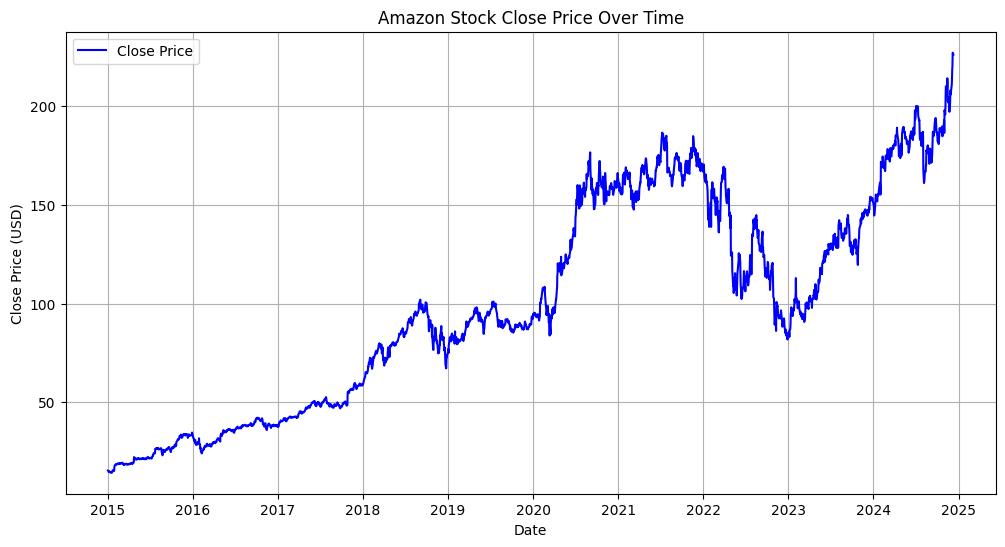

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(amazon_stock_data['Date'], amazon_stock_data['Close'], label='Close Price', color='blue')
plt.title('Amazon Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()

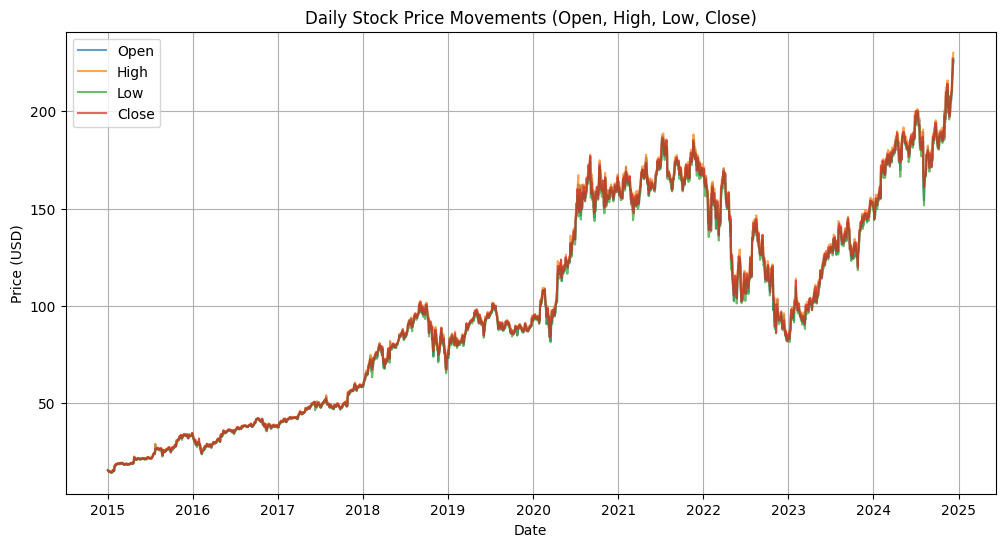

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(amazon_stock_data['Date'], amazon_stock_data['Open'], label='Open', alpha=0.7)
plt.plot(amazon_stock_data['Date'], amazon_stock_data['High'], label='High', alpha=0.7)
plt.plot(amazon_stock_data['Date'], amazon_stock_data['Low'], label='Low', alpha=0.7)
plt.plot(amazon_stock_data['Date'], amazon_stock_data['Close'], label='Close', alpha=0.7)
plt.title('Daily Stock Price Movements (Open, High, Low, Close)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()

In [28]:
import seaborn as sns

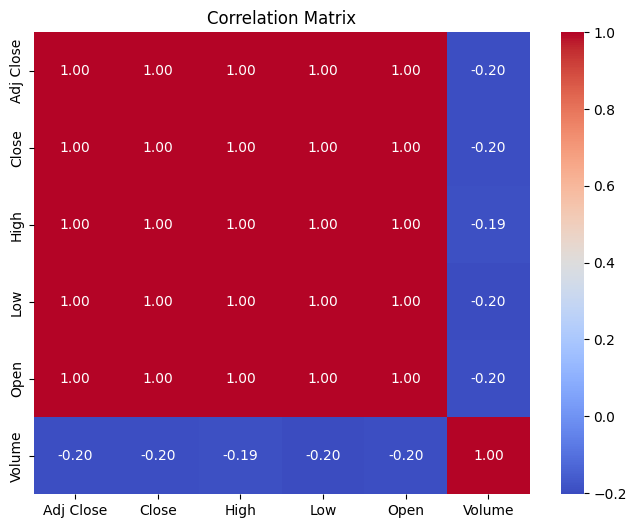

In [29]:
correlation_matrix = amazon_stock_data[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [31]:
amazon_stock_data['Lag_1'] = amazon_stock_data['Close'].shift(1)
amazon_stock_data = amazon_stock_data.dropna()
X = amazon_stock_data[['Lag_1']]  # You can add more features like moving averages
y = amazon_stock_data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 5.602917288915349
R-squared: 0.9979792938721983


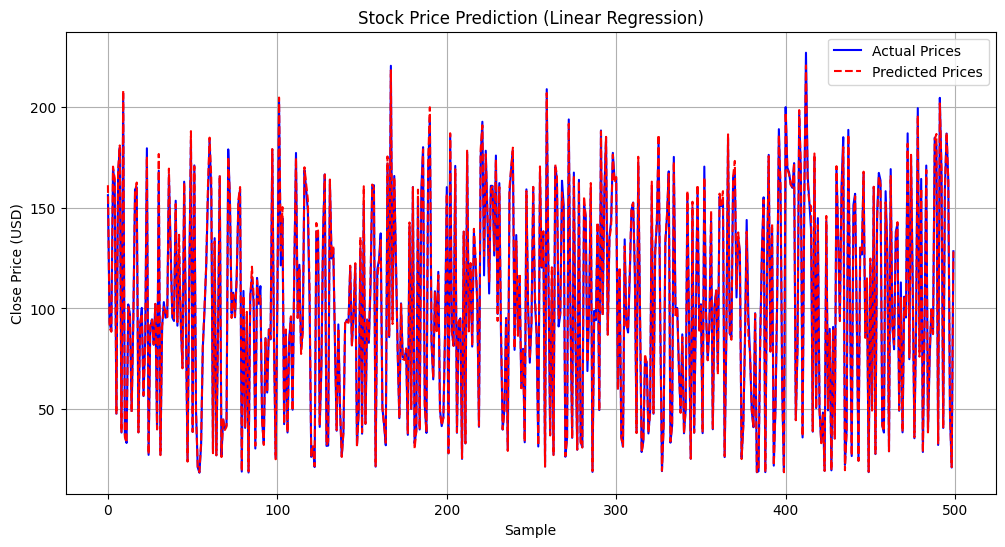

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red', linestyle='dashed')
plt.title('Stock Price Prediction (Linear Regression)')
plt.xlabel('Sample')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid()
plt.show()